<a href="https://colab.research.google.com/github/pesado-dev/DATA_SCIENCE/blob/main/desafio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Etapa 01: Análise exploratória dos dados
import pandas as pd


In [4]:
pip install requests


In [5]:
import pandas as pd
import requests
from io import StringIO

# URL do arquivo CSV
url = "https://file.notion.so/f/f/6a055055-52ec-4ebb-a697-63027c951344/75a740fb-4146-455a-8d13-6a24ba56d2c8/streaming_data.csv?id=7f01c93d-8cfd-46fb-9f2a-8f0bbd2fbaae&table=block&spaceId=6a055055-52ec-4ebb-a697-63027c951344&expirationTimestamp=1702189550728&signature=1U_7rhMWEAZF9KIYYuiI2t_KZs4rIrbjrcH-xdVSRUM"

# Baixar o conteúdo do CSV
response = requests.get(url)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Ler o CSV a partir do conteúdo baixado
    df = pd.read_csv(StringIO(response.text))

    # Exibir as primeiras linhas do DataFrame
    print(df.head())
else:
    print(f"Erro ao baixar o arquivo. Código de status: {response.status_code}")


    Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0  49.0    Male            4700.0                3.0             Basic   
1  69.0  Female            6107.0                2.0          Standard   
2  44.0    Male            6374.0                3.0           Premium   
3  26.0    Male               NaN                5.0             Basic   
4  18.0     NaN            1948.0                3.0             Basic   

   Num_streaming_services  Num_active_profiles  Avg_rating  Churned  \
0                     NaN                    3         NaN      0.0   
1                     NaN                    1        2.14      0.0   
2                     1.0                    1        1.91      1.0   
3                     NaN                    2         NaN      NaN   
4                     NaN                    3        3.88      0.0   

                                User_id  
0  a271aa56-bcfc-4f0a-91f7-b773de6b86a4  
1  fe14b048-770b-4619-8ec6-485b0969ae31  
2 

In [6]:
# Tipos de dados
print(df.dtypes)

# Quantidade de valores faltantes
print(df.isna().sum())


Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object
Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


In [7]:
# Etapa 02: Tratamento dos dados
# Substituir valores NaN por 0 em colunas específicas
df.fillna({'Time_on_platform': 0, 'Num_streaming_services': 0, 'Churned': 0, 'Avg_rating': 0, 'Devices_connected': 0}, inplace=True)



In [8]:
# Dropar linhas nulas nas colunas Gender, Subscription_type e Age
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)



In [9]:
# Transformando valores Churned 0 e 1 por No e Yes
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})



In [10]:
# Transformando valores floats em valores inteiros
df['Num_streaming_services'] = df['Num_streaming_services'].astype(int)
df['Avg_rating'] = df['Avg_rating'].astype(int)
df['Devices_connected'] = df['Devices_connected'].astype(int)



In [11]:
# Etapa 03: Modelagem dos Dados - Regressão Logística
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [12]:
# Definir variáveis X e y para o modelo
X = df.drop(columns=['Churned'])
y = LabelEncoder().fit_transform(df['Churned'])


In [13]:
import pandas as pd

# Exemplo de dados
data = {'age': [25, 30, 35, 40],
        'gender': ['Male', 'Female', 'Male', 'Female'],
        'num_contents': [10, 15, 20, 25],
        'avg_rating': [4.5, 3.5, 4.0, 5.0]}

df = pd.DataFrame(data)

# Codificação one-hot em uma linha
df_encoded = pd.get_dummies(df, columns=['gender'])

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_encoded[['age', 'num_contents', 'avg_rating']])

# Exibir os dados normalizados
print(X_scaled)


[[0.         0.         0.66666667]
 [0.33333333 0.33333333 0.        ]
 [0.66666667 0.66666667 0.33333333]
 [1.         1.         1.        ]]


In [14]:
# Certifique-se de que 'y' está corretamente definido e é unidimensional
y = df['gender']

# Garantir que X_scaled tenha o mesmo número de amostras que y
X_scaled = X_scaled[:len(y)]

# Separar em train e test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Prever as classes no conjunto de teste
y_pred = model.predict(X_test)


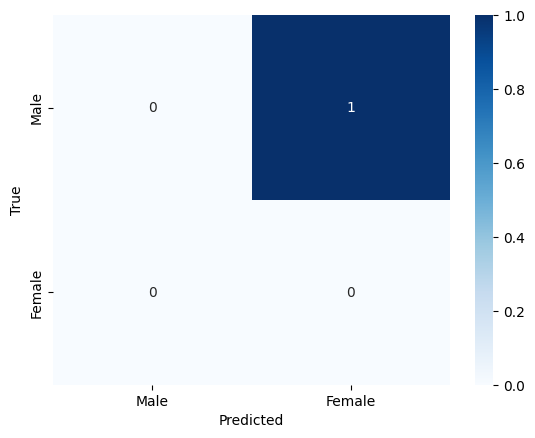

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['gender'].unique(), yticklabels=df['gender'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
print(df.columns)


Index(['age', 'gender', 'num_contents', 'avg_rating'], dtype='object')


In [21]:
print(df.head())


   age  gender  num_contents  avg_rating
0   25    Male            10         4.5
1   30  Female            15         3.5
2   35    Male            20         4.0
3   40  Female            25         5.0


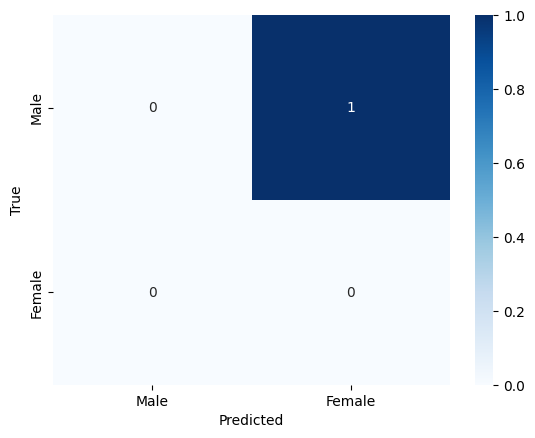

In [23]:
# Definir variáveis X e y para o modelo
X = df.drop(columns=['gender'])
y = LabelEncoder().fit_transform(df['gender'])

# Separar em train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['gender'].unique(), yticklabels=df['gender'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
